# Fully Connected Autoencoder Example
modified from https://blog.keras.io/building-autoencoders-in-keras.html

## Prepare Data Set

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
(x_train, _),(x_test, _) = mnist.load_data()

## Check Data 

x_train shape: (60000, 28, 28)  x_test shape: (10000, 28, 28)


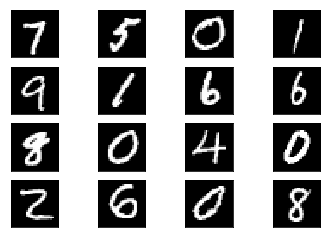

In [3]:
import matplotlib.pyplot as plt
print('x_train shape: {}  x_test shape: {}'.format(np.shape(x_train),np.shape(x_test)))
for i in range(16):
    plt.subplot(4, 4, 1 + i, xticks=[], yticks=[])
    img_id = np.random.randint(np.shape(x_train)[0])
    im = x_train[img_id,::]
    plt.imshow(im)
    plt.gray()

## Preprocessing Data

In [4]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


## Build Model 

In [5]:
from tensorflow.keras.layers import Dense
autoencoder = tf.keras.Sequential()
#Encoder
autoencoder.add(Dense(128,activation='relu',input_shape=(784,)))
autoencoder.add(Dense(64,activation='relu'))

#Compressed representation
autoencoder.add(Dense(32,activation='relu'))

#Decoder
autoencoder.add(Dense(64,activation='relu'))
autoencoder.add(Dense(128,activation='relu'))
autoencoder.add(Dense(784,activation='sigmoid'))

autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_4 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_5 (Dense)              (None, 784)               101136    
Total params: 222,384
Trainable params: 222,384
Non-trainable params: 0
_________________________________________________________________


## Train Model

In [6]:
autoencoder.compile(optimizer='adadelta', loss='mse')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 4s 70us/step - loss: 0.1152 - val_loss: 0.0695
Epoch 2/100
60000/60000 [==============================] - 3s 53us/step - loss: 0.0684 - val_loss: 0.0679
Epoch 3/100
60000/60000 [==============================] - 3s 53us/step - loss: 0.0670 - val_loss: 0.0667
Epoch 4/100
60000/60000 [==============================] - 3s 55us/step - loss: 0.0656 - val_loss: 0.0650
Epoch 5/100
60000/60000 [==============================] - 3s 57us/step - loss: 0.0632 - val_loss: 0.0613
Epoch 6/100
60000/60000 [==============================] - 3s 53us/step - loss: 0.0593 - val_loss: 0.0576
Epoch 7/100
60000/60000 [==============================] - 3s 53us/step - loss: 0.0568 - val_loss: 0.0555
Epoch 8/100
60000/60000 [==============================] - 3s 53us/step - loss: 0.0548 - val_loss: 0.0532
Epoch 9/100
60000/60000 [==============================] - 3s 53us/step - loss: 0.0516 - val_loss: 0.0

Epoch 77/100
60000/60000 [==============================] - 3s 48us/step - loss: 0.0189 - val_loss: 0.0184
Epoch 78/100
60000/60000 [==============================] - 3s 48us/step - loss: 0.0188 - val_loss: 0.0181
Epoch 79/100
60000/60000 [==============================] - 3s 51us/step - loss: 0.0186 - val_loss: 0.0180
Epoch 80/100
60000/60000 [==============================] - 3s 49us/step - loss: 0.0185 - val_loss: 0.0182
Epoch 81/100
60000/60000 [==============================] - 3s 48us/step - loss: 0.0184 - val_loss: 0.0180
Epoch 82/100
60000/60000 [==============================] - 3s 49us/step - loss: 0.0184 - val_loss: 0.0180
Epoch 83/100
60000/60000 [==============================] - 3s 48us/step - loss: 0.0182 - val_loss: 0.0179
Epoch 84/100
60000/60000 [==============================] - 3s 49us/step - loss: 0.0181 - val_loss: 0.0178
Epoch 85/100
60000/60000 [==============================] - 3s 50us/step - loss: 0.0181 - val_loss: 0.0177
Epoch 86/100
60000/60000 [===========

## Evaluate Model

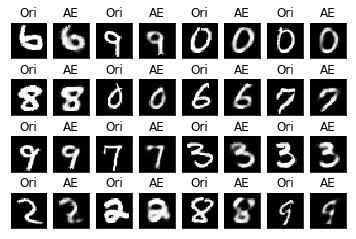

In [7]:
x_recon = autoencoder.predict(x_test)
for i in range(16):
    plt.subplot(4, 8, 1 + i*2, xticks=[], yticks=[])
    img_id = np.random.randint(np.shape(x_test)[0])
    im = x_test[img_id,::].reshape([28,28])
    plt.imshow(im)
    plt.gray()
    plt.title('Ori')
    plt.subplot(4, 8, 2 + i*2, xticks=[], yticks=[])
    
    im = x_recon[img_id,::].reshape([28,28])
    plt.imshow(im)
    plt.gray()
    plt.title('AE')

# Denosing with Autoencoder 

## Add noise to data

In [21]:
noise_factor = 0.7
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

## Check Data 

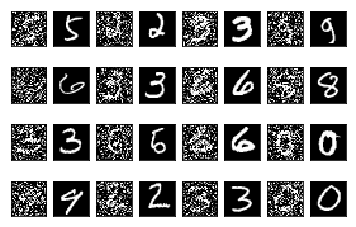

In [25]:
for i in range(16):
    plt.subplot(4, 8, 1 + i*2, xticks=[], yticks=[])
    img_id = np.random.randint(np.shape(x_train)[0])
    im = x_train_noisy[img_id,::].reshape([28,28])
    plt.imshow(im)
    plt.gray()
    
    plt.subplot(4, 8, 2 + i*2, xticks=[], yticks=[])
    im = x_train[img_id,::].reshape([28,28])
    plt.imshow(im)
    plt.gray()

## Create a New Model for Denosing

In [16]:
tf.reset_default_graph()
tf.keras.backend.clear_session()
autoencoder = tf.keras.Sequential()
#Encoder
autoencoder.add(Dense(128,activation='relu',input_shape=(784,)))
autoencoder.add(Dense(64,activation='relu'))

#Compressed representation
autoencoder.add(Dense(32,activation='relu'))

#Decoder
autoencoder.add(Dense(64,activation='relu'))
autoencoder.add(Dense(128,activation='relu'))
autoencoder.add(Dense(784,activation='sigmoid'))

#Train
autoencoder.compile(optimizer='adadelta', loss='mse')

autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 5s 78us/step - loss: 0.1021 - val_loss: 0.0688
Epoch 2/100
60000/60000 [==============================] - 3s 48us/step - loss: 0.0681 - val_loss: 0.0678
Epoch 3/100
60000/60000 [==============================] - 3s 54us/step - loss: 0.0671 - val_loss: 0.0667
Epoch 4/100
60000/60000 [==============================] - 3s 56us/step - loss: 0.0659 - val_loss: 0.0656
Epoch 5/100
60000/60000 [==============================] - 4s 69us/step - loss: 0.0644 - val_loss: 0.0636
Epoch 6/100
60000/60000 [==============================] - 4s 66us/step - loss: 0.0626 - val_loss: 0.0620
Epoch 7/100
60000/60000 [==============================] - 3s 53us/step - loss: 0.0614 - val_loss: 0.0607
Epoch 8/100
60000/60000 [==============================] - 3s 47us/step - loss: 0.0597 - val_loss: 0.0587
Epoch 9/100
60000/60000 [==============================] - 3s 46us/step - loss: 0.0576 - val_loss: 0.0

60000/60000 [==============================] - 4s 60us/step - loss: 0.0272 - val_loss: 0.0269
Epoch 78/100
60000/60000 [==============================] - 3s 44us/step - loss: 0.0271 - val_loss: 0.0271
Epoch 79/100
60000/60000 [==============================] - 3s 44us/step - loss: 0.0270 - val_loss: 0.0273
Epoch 80/100
60000/60000 [==============================] - 2s 41us/step - loss: 0.0269 - val_loss: 0.0268
Epoch 81/100
60000/60000 [==============================] - 3s 44us/step - loss: 0.0269 - val_loss: 0.0268
Epoch 82/100
60000/60000 [==============================] - 3s 44us/step - loss: 0.0267 - val_loss: 0.0265
Epoch 83/100
60000/60000 [==============================] - 2s 40us/step - loss: 0.0266 - val_loss: 0.0267
Epoch 84/100
60000/60000 [==============================] - 2s 39us/step - loss: 0.0266 - val_loss: 0.0263
Epoch 85/100
60000/60000 [==============================] - 2s 38us/step - loss: 0.0265 - val_loss: 0.0262
Epoch 86/100
60000/60000 [========================

## Evaluate Model

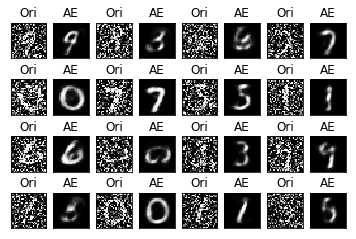

In [23]:
x_denoise = autoencoder.predict(x_test_noisy)
for i in range(16):
    plt.subplot(4, 8, 1 + i*2, xticks=[], yticks=[])
    img_id = np.random.randint(np.shape(x_test_noisy)[0])
    im = x_test_noisy[img_id,::].reshape([28,28])
    plt.imshow(im)
    plt.gray()
    plt.title('Ori')
    plt.subplot(4, 8, 2 + i*2, xticks=[], yticks=[])
    
    im = x_denoise[img_id,::].reshape([28,28])
    plt.imshow(im)
    plt.gray()
    plt.title('AE')